In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import nxviz as nv
from nxviz import annotate
from nxviz import highlights
from nxviz.utils import edge_table, node_table
from random import choice
from collections import defaultdict
from datetime import date

C:\Users\mkars\anaconda3\lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
T_full_DiGraph = nx.read_gpickle('ego-twitter.p')

In [3]:
T_full = T_full_DiGraph.to_undirected()
type(T_full)

networkx.classes.graph.Graph

In [4]:
sub_nodes = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
T_sub = T_full.subgraph(sub_nodes)

# Chapter 1 - Introduction to networks

In [5]:
len(T_full.nodes), len(T_full.edges)

(23369, 32872)

In [6]:
len(T_sub.nodes), len(T_sub.edges)

(48, 112)

In [7]:
T = T_full

In [8]:
T.nodes(data=True)

NodeDataView({1: {'category': 'I', 'occupation': 'politician'}, 3: {'category': 'D', 'occupation': 'celebrity'}, 4: {'category': 'I', 'occupation': 'politician'}, 5: {'category': 'I', 'occupation': 'scientist'}, 6: {'category': 'D', 'occupation': 'politician'}, 7: {'category': 'I', 'occupation': 'politician'}, 8: {'category': 'I', 'occupation': 'celebrity'}, 9: {'category': 'D', 'occupation': 'scientist'}, 10: {'category': 'D', 'occupation': 'celebrity'}, 11: {'category': 'I', 'occupation': 'celebrity'}, 12: {'category': 'I', 'occupation': 'celebrity'}, 13: {'category': 'P', 'occupation': 'scientist'}, 14: {'category': 'D', 'occupation': 'celebrity'}, 15: {'category': 'P', 'occupation': 'scientist'}, 16: {'category': 'P', 'occupation': 'politician'}, 17: {'category': 'I', 'occupation': 'scientist'}, 18: {'category': 'I', 'occupation': 'celebrity'}, 19: {'category': 'I', 'occupation': 'scientist'}, 20: {'category': 'P', 'occupation': 'scientist'}, 21: {'category': 'I', 'occupation': 'ce

In [9]:
T.edges(data=True)

EdgeDataView([(1, 3, {'date': datetime.date(2012, 11, 16)}), (1, 4, {'date': datetime.date(2013, 6, 7)}), (1, 5, {'date': datetime.date(2009, 7, 27)}), (1, 6, {'date': datetime.date(2014, 12, 18)}), (1, 7, {'date': datetime.date(2010, 10, 18)}), (1, 8, {'date': datetime.date(2012, 4, 18)}), (1, 9, {'date': datetime.date(2007, 10, 14)}), (1, 10, {'date': datetime.date(2012, 9, 8)}), (1, 11, {'date': datetime.date(2010, 1, 6)}), (1, 12, {'date': datetime.date(2012, 12, 27)}), (1, 13, {'date': datetime.date(2008, 12, 18)}), (1, 14, {'date': datetime.date(2014, 5, 25)}), (1, 15, {'date': datetime.date(2009, 11, 12)}), (1, 16, {'date': datetime.date(2008, 8, 6)}), (1, 17, {'date': datetime.date(2007, 8, 11)}), (1, 18, {'date': datetime.date(2009, 10, 7)}), (1, 19, {'date': datetime.date(2008, 7, 24)}), (1, 20, {'date': datetime.date(2013, 11, 18)}), (1, 21, {'date': datetime.date(2011, 3, 28)}), (1, 22, {'date': datetime.date(2013, 3, 4)}), (1, 23, {'date': datetime.date(2012, 4, 20)}), (1,

In [10]:
list(T.nodes(data=True))[-1]

(23370, {'category': 'P', 'occupation': 'politician'})

In [11]:
list(T.edges(data=True))[-1]

(23324, 23336, {'date': datetime.date(2010, 9, 20)})

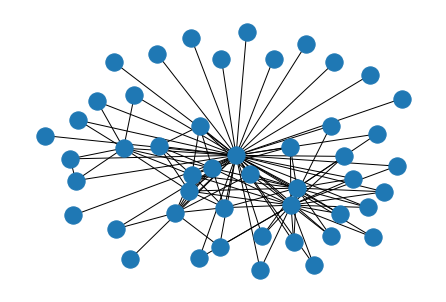

In [12]:
# Draw the graph to screen
nx.draw(T_sub)
plt.show()

In [13]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]

In [14]:
type(T)

networkx.classes.graph.Graph

In [15]:
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        T.edges[u, v]['weight'] = 1.1

In [16]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

        # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

In [17]:
# Check whether number of self loops equals the number of nodes in self loops
# assert T.number_of_selfloops() == len(find_selfloop_nodes(T))
assert nx.number_of_selfloops(T) == len(find_selfloop_nodes(T))

In [18]:
T = T_sub

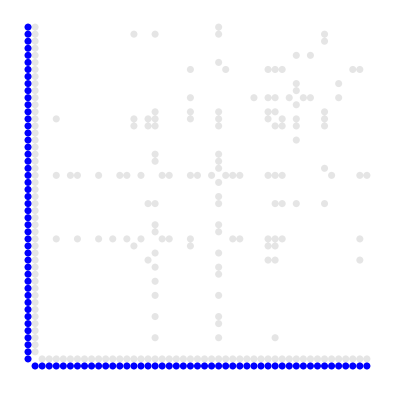

In [19]:
fig, ax = plt.subplots(figsize=(7, 7))
ax = nv.matrix(T)
plt.show()

In [20]:
# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

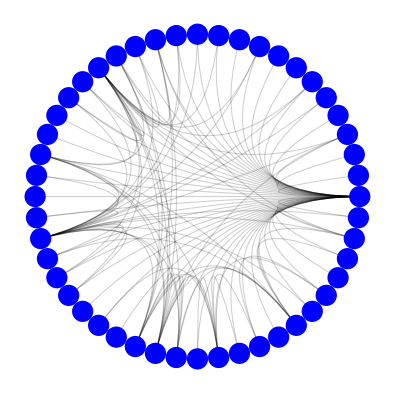

In [21]:
fig, ax = plt.subplots(figsize=(7, 7))
ax = nv.circos(T)
plt.show()

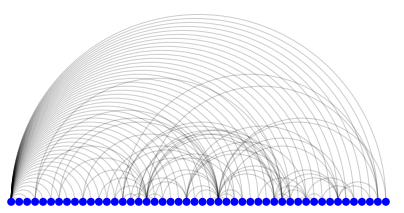

In [22]:
fig, ax = plt.sufig, ax = plt.subplots(figsize=(7, 7))
ax = nv.arc(T)
plt.show()

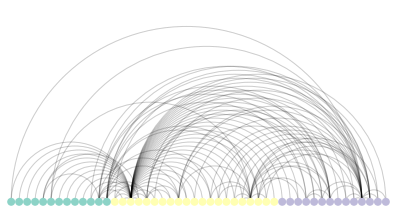

In [23]:
fig, ax = plt.sufig, ax = plt.subplots(figsize=(7, 7))
ax = nv.arc(T, sort_by='category', node_color_by='category')
plt.show()

# Chapter 2 - Important nodes

In [24]:
T = T_full

In [25]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

In [26]:
# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)

{22533, 8, 9, 2569, 15, 3088, 21, 3098, 2587, 3099, 15390, 2591, 3108, 7722, 558, 560, 14898, 2611, 2618, 2623, 69, 1094, 2124, 12877, 1102, 81, 2129, 9815, 1112, 3673, 1118, 2661, 1132, 110, 1140, 3703, 2686, 2693, 1164, 2190, 8340, 662, 154, 680, 3754, 5807, 10944, 10950, 9930, 10964, 4829, 1250, 14563, 8942, 1264, 8948, 8953, 1274, 12026, 12027, 2821, 2824, 777, 1812, 5399, 1308, 797, 12576, 1315, 4902, 809, 5418, 16681, 813, 814, 5426, 7988, 826, 829, 3903, 834, 7498, 331, 846, 6991, 9553, 850, 857, 14171, 1374, 3936, 12642, 17762, 356, 870, 2927, 1921, 4997, 1927, 12168, 4495, 6547, 1941, 1946, 16794, 6557, 6047, 1952, 10149, 6059, 429, 943, 945, 2491, 3007, 19904, 3009, 5573, 5066, 971, 1483, 5578, 5582, 2511, 20430, 3539, 9689, 2524, 11764, 8181, 1526, 6140}


In [27]:
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]

# Print the degrees
print(degrees)

[56, 3, 1, 14, 7, 7, 6, 6, 2, 8, 5, 2, 4, 6, 25, 8, 23, 28, 8, 6, 1, 1, 43, 2, 1, 5, 34, 9, 7, 15, 1, 2, 62, 46, 67, 50, 2, 12, 2, 3, 56, 54, 4, 31, 1, 2, 17, 4, 16, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 27, 8, 13, 4, 11, 5, 6, 36, 4, 15, 3, 14, 42, 12, 2, 12, 5, 4, 6, 4, 3, 9, 1, 1, 1, 1, 1, 1, 1, 3, 1, 40, 1, 1, 3, 1, 2, 1, 1, 3, 9, 9, 1, 1, 1, 1, 2, 6, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 15, 1, 5, 5, 5, 16, 1, 1, 1, 2, 11, 1, 1, 4, 10, 19, 2, 34, 1, 8, 6, 2, 13, 12, 3, 2, 4, 24, 1, 2, 2, 3, 24, 2, 1, 1, 1, 2, 1, 1, 1, 1, 11, 1, 1, 26, 10, 1, 1, 1, 24, 1, 3, 3, 5, 2, 4, 2, 2, 2, 1, 25, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 14, 1, 1, 1, 1, 1, 1, 4, 1, 1, 5, 7, 1, 95, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 24, 1, 1, 1, 1, 1, 3, 3, 13, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 2, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 35, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

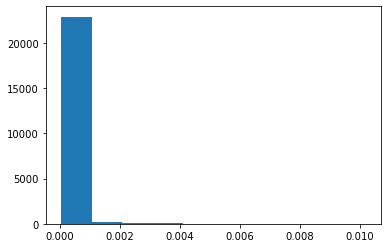

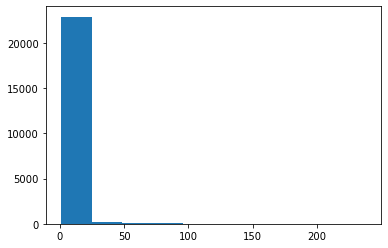

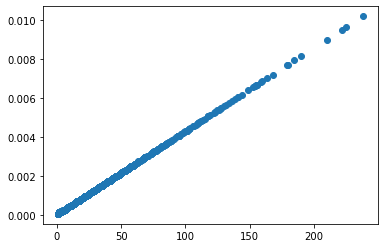

In [28]:
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()

In [29]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = list(G.neighbors(node))
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

In [30]:
T = T_sub

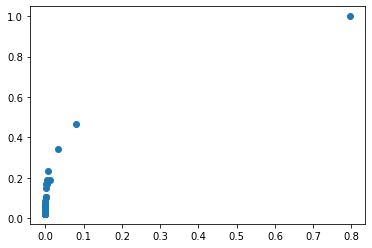

In [31]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()

In [32]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

In [33]:
T = T_full

In [34]:
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

{11824}


In [35]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

In [36]:
T = T_sub

In [37]:
# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T)
print(top_bc)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())

{1}


# Chapter 3 - Structures

In [38]:
# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

In [39]:
# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

In [40]:
# Write the assertion statement
print(len(nodes_in_triangle(T, 1)))
assert len(nodes_in_triangle(T, 1)) == 35

35


In [41]:
# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

In [42]:
# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

22


In [43]:
T = T_sub

In [44]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in list(nx.find_cliques(G)):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

In [45]:
# Check that there are 33 maximal cliques of size 3 in the graph T
print(len(maximal_cliques(T, 3)))
assert len(maximal_cliques(T, 3)) == 33

33


In [46]:
# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in list(G.neighbors(n)):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

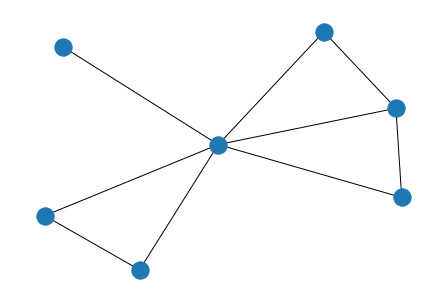

In [47]:
# Extract the subgraph with the nodes of interest: T_draw
nodes_of_interest = [29, 38, 42]
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show()

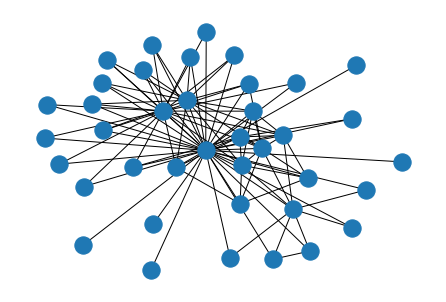

In [48]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()

# Chapter 4 - Bringing it all together

In [49]:
G_full = nx.read_gpickle('github_users.p')

In [50]:
type(G_full)

networkx.classes.graph.Graph

In [51]:
len(G_full.nodes()), len(G_full.edges())

(56519, 72900)

In [52]:
G_sub_nodes = ['u41', 'u69', 'u96', 'u156', 'u297', 'u298', 'u315', 'u322', 'u435', 'u440', 'u640', 'u655', 'u698', 'u821', 'u863', 'u901', 'u914', 'u1254', 'u1407', 'u1468', 'u1908', 'u2022', 'u2066', 'u2137', 'u2289', 'u2482', 'u2552', 'u2643', 'u2737', 'u2906', 'u3083', 'u3174', 'u3231', 'u3243', 'u3271', 'u3658', 'u3974', 'u3979', 'u4159', 'u4199', 'u4329', 'u4412', 'u4513', 'u4710', 'u4761', 'u4953', 'u5082', 'u5337', 'u5693', 'u5993', 'u6081', 'u7418', 'u7623', 'u7963', 'u8135', 'u9866', 'u9869', 'u9997', 'u10090', 'u10340', 'u10500', 'u10603', 'u14964']
G_sub = G_full.subgraph(G_sub_nodes)
len(G_sub.nodes()), len(G_sub.edges())

(63, 282)

In [53]:
G = G_full

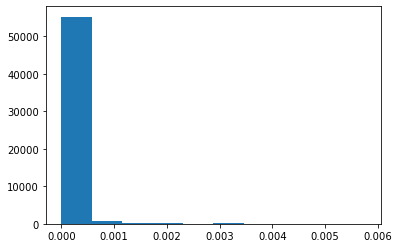

In [54]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

In [55]:
G = G_sub

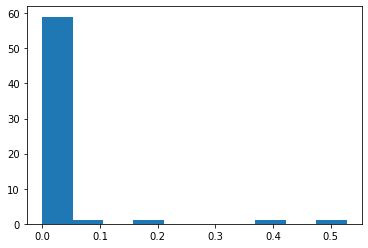

In [56]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()

In [57]:
# Calculate the largest connected component subgraph: largest_ccs
ccs = (G.subgraph(c) for c in nx.connected_components(G))
largest_ccs = sorted(ccs, key=lambda x: len(x))[-1]

In [58]:
node_table(largest_ccs)

,bipartite
u1468,users
u3083,users
u4513,users
u3271,users
u10603,users
...,...
u297,users
u156,users
u10090,users
u2552,users


In [59]:
edge_table(largest_ccs)

,source,target
0,u1468,u5993
1,u5993,u1468
2,u1468,u2643
3,u2643,u1468
4,u1468,u2022
...,...,...
559,u156,u297
560,u297,u2552
561,u2552,u297
562,u156,u2552


In [60]:
u, v = choice(list(G.edges()))

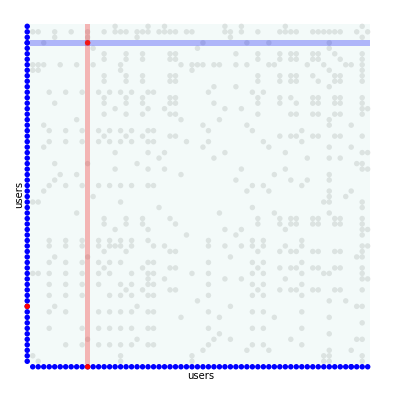

In [61]:
# Create the customized MatrixPlot object: h
fig, ax = plt.subplots(figsize=(7, 7))
ax = nv.matrix(largest_ccs, group_by='bipartite')
annotate.matrix_group(largest_ccs, group_by="bipartite") 
annotate.matrix_block(largest_ccs, group_by="bipartite", color_by="group", alpha=0.1) 
highlights.matrix_node(largest_ccs, u, group_by="bipartite", sort_by="bipartite") 
highlights.matrix_node(largest_ccs, v, group_by="bipartite", sort_by="bipartite", color="blue") 
highlights.matrix_row(largest_ccs, u, group_by="bipartite", sort_by="bipartite") 
highlights.matrix_row(largest_ccs, v, group_by="bipartite", sort_by="bipartite", axis="y", color="blue") 
highlights.matrix_edge(largest_ccs, u, v, group_by="bipartite", sort_by="bipartite")
plt.show()

In [62]:
# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.nodes[n]['degree'] = nx.degree(G, n)

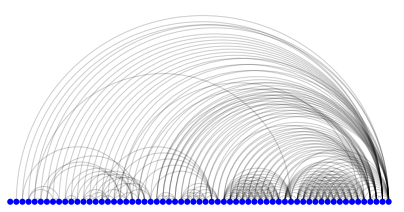

In [63]:
# Create the Arc Plot 
fig, ax = plt.subplots(figsize=(7, 7))
ax = nv.arc(G, sort_by="degree")
plt.show()

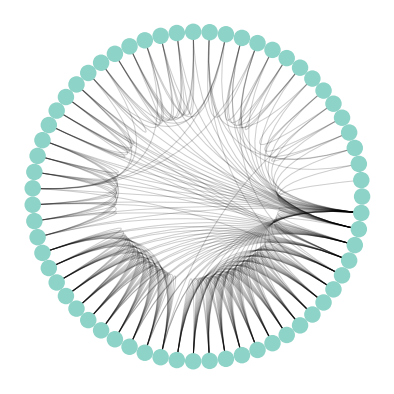

In [64]:
# Create the Circos Plot
fig, ax = plt.subplots(figsize=(7, 7))
ax = nv.circos(G, sort_by="degree", group_by='bipartite', node_color_by="bipartite")
plt.show()

In [65]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

19


In [66]:
# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

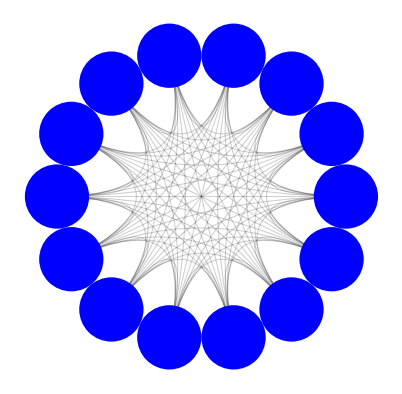

In [67]:
# Create the Circos Plot
fig, ax = plt.subplots(figsize=(7, 7))
ax = nv.circos(G_lc)
plt.show()

In [68]:
G = G_full

In [69]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())
# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

['u741']


In [70]:
G = G_sub

In [71]:
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.nodes[n]['degree centrality']  = nx.degree_centrality(G_lmc)[n]

In [72]:
# ?nv.arc

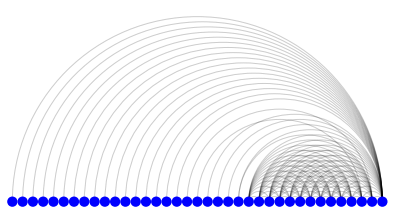

In [73]:
# Create the Arc Plot 
fig, ax = plt.subplots(figsize=(7, 7))
ax = nv.arc(G_lmc, sort_by="degree centrality")
plt.show()

In [74]:
# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[('u655', 'u2022'), ('u2022', 'u4159')]


You've identified pairs of users who should collaborate together, and in doing so, built your very own recommendation system!